In [1]:
"""
<데이터 현황 분석>
 - 관광객 입국 데이터를 이용해서
 - 냔월별 입국객의 변화 추이를 시각화하여
 - 계절적으로 나타나는 입국객들의 증강 패턴 확인
 - 해석 : 어떤 이슈(인사이트)가 있는지 확인
"""

'\n<데이터 현황 분석>\n - 관광객 입국 데이터를 이용해서\n - 냔월별 입국객의 변화 추이를 시각화하여\n - 계절적으로 나타나는 입국객들의 증강 패턴 확인\n - 해석 : 어떤 이슈(인사이트)가 있는지 확인\n'

### 시각화에 사용할 데이터 읽어들이기

In [2]:
### 데이터프레임 변수명 : df
import pandas as pd

file_path = "./files_total/kto_total.xlsx"
df = pd.read_excel(file_path)

df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,자국내_관광객비율,국가별_관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.387,3.461
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.000,0.138
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.076,3.337
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.222,0.041
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.598,0.051
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.784,0.166
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.158,0.003


In [3]:
### 데이터 정보확인하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   국적            6960 non-null   object 
 1   관광            6960 non-null   int64  
 2   상용            6960 non-null   int64  
 3   공용            6960 non-null   int64  
 4   유학/연수         6960 non-null   int64  
 5   기타            6960 non-null   int64  
 6   계             6960 non-null   int64  
 7   기준년월          6960 non-null   object 
 8   대륙            6960 non-null   object 
 9   자국내_관광객비율     6960 non-null   float64
 10  국가별_관광객비율(%)  6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [4]:
### 기초통계 확인하기

df.describe()

,관광,상용,공용,유학/연수,기타,계,자국내_관광객비율,국가별_관광객비율(%)
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,14151.834914,310.131178,61.251149,303.418822,3383.024713,18209.660776,62.111801,1.666673
std,52351.026147,1043.723255,250.858698,2116.778318,10269.311046,62120.322558,24.763256,5.915041
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,500.000000,17.000000,1.000000,7.000000,219.000000,953.000000,44.313500,0.064000
50%,1218.500000,50.000000,5.000000,26.000000,611.000000,2235.500000,68.568500,0.147000
75%,5805.000000,225.250000,25.000000,85.000000,1854.250000,9773.750000,80.739750,0.736500
max,823016.000000,25012.000000,3763.000000,44291.000000,137898.000000,917519.000000,100.000000,58.557000


### 데이터 시각화하기

#### 시각화 라이브러리

In [5]:
### 시각화를 위한 라이브러리들 중에 기본 라이브러리
import matplotlib.pyplot as plt

### 한글 깨짐 방지 처리
plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
### 마이너스 특수기호 깨징 방지 처리
plt.rcParams["axes.unicode_minus"] = False

### 시각화에 필요한 데이터 가공하기

In [6]:
### 중국 국가에 대한 년월별 관광객 변화 추이 시각화
# - 사용할 그래프 : 선그래프 (추이 분석에 주로 사용됨)
# - 필요한 데이터 : x축 및 y축 데이터 필요
# - x축 데이터 컬럼명 : 기준년월(범주형 데이터)
# - y축 데이터 컬럼명 : 관광(연속형 데이터)

### 데이터 형태
# - 범주형 데이터 : 구분이 가능한 "문자열(숫자도 가능)" 데이터들(성별, 일자, 지역 ....)
#                : 그래프의 x축에 주로 사용됨

# - 연속형 데이터 : 증감이 발생하는 "숫자" 데이터들(갯수, 몸무게, 나이, ....)
#                : 그래프의 y축에 주로 사용됨

In [7]:
### 중국 국가에 대한 시각화를 위한 데이터 추출(가공)하기
# - 중국 국가에 대한 전체 데이터 조회
# - 데이터프레임 변수명 : df_fillter

c = df["국적"] == "중국"
df_fillter = df[c == True]
df_fillter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,자국내_관광객비율,국가별_관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.300,10.086
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.103,13.569
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.580,9.227
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.050,15.508
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.804,16.952
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.232,29.695
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.721,33.557
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.198,31.926
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.699,36.077


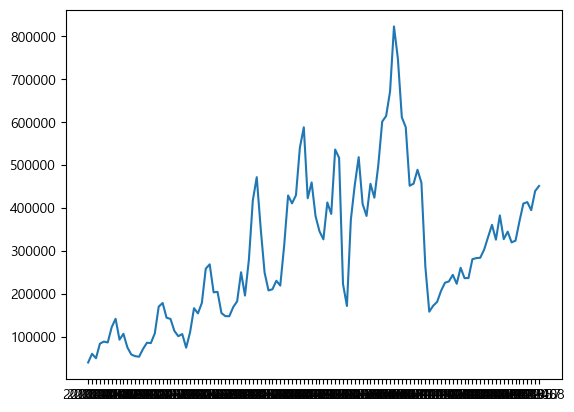

In [8]:
### 년월별 중국 관광객 변화 추이 시각화
# - plot(x, y) : 선그래프
plt.plot(df_fillter["기준년월"], df_fillter["관광"])

# - 그래프가 그려지면 메모리가 사용됨. 
#   따라서, show()를 통해 메모리 소멸 시킴
plt.show()

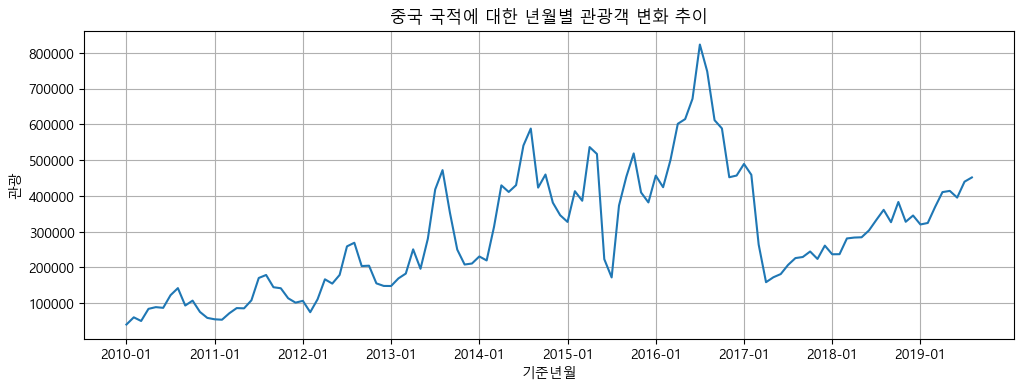

In [9]:
### 그래프 편집하기

# - 그래프 크기 조정하기
plt.figure(figsize=(12,4))

# - 그래프 대제목 넣기
plt.title("중국 국적에 대한 년월별 관광객 변화 추이")

# 선그리기
plt.plot(df_fillter["기준년월"], df_fillter["관광"])

# x축 및 y축 이름(라벨) 넣기
plt.xlabel("기준년월")
plt.ylabel("관광")

# - x축의 값의 범위를 조정하여 보기 좋기 표시하기(재정의)
#    --> x축에 표시할 값을 재정의 해야함
#   ---> 2010~2019년까지 1월 기준으로만 범주 생성
x_list = ["2010-01", "2011-01", "2012-01","2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
plt.xticks(x_list)

# - 모눈선 그리기(모기좋기)
plt.grid()

# - 그래프 메모리 삭제
plt.show()

### (해석 해야함)
# - 매년 점진적으로 관광객 추이가 증가하는 추이를 보이고 있음
# - 계정성 : 보통 매년 중반부(여름)에 급격한관광객 추이를 보이고 있음
# - 이벤트 : 2015년 중반부와 2017년 초반부터 이상 패턴을 나타내고 있음
#         : 2015년 중반부에 나타난 현상은 2016년도에 회복이 된 것으로 보아
#           일시적 현상에 의한 것으로 보임
#         : 2017년초반에 나타난 현상은 이후 회복이 안된 것으로 보아
#           일시적 현상이 아닌 장기적 문제가 있었을 것으로 판단됨
# - 인사이트 : 이벤트에 대한 확인 필요
#           : 확인 결과 2015년 중반부에는 "메르스 감염병" 원인에 따른 일시적 현상으로 나타났으며,
#           : 2017년에는 한국내 "사드배치" 원인에 따른 원인으로 회복이 안되고 있는 것으로 파악

### 우리나라에 방문하는 국가별 관광객이 가장 많은 국가 tops5 조회하기

In [10]:
### 1. 국가별로 국가별 관광객비율의 평균을 집계(그룹화)하기
# - pivot_table() : 집계할 때 사용하는 함수(데이터프레임 클래스에서 제공함)
# - index : 집계할 기준(범주를 의미함)
# - values : 집계에 사용할 데이터가 있는 컬럼 지정
# - aggfunc : 집계에 사용할 기초통계 함수(그룹함수) 정의
temp = df.pivot_table(index ="국적", values="국가별_관광객비율(%)", aggfunc="mean")
temp

### 2. 국가별 관광객 비율 평균을 기준으로 정렬(내림차순) 하기
# - sort_values() : 값을 이용한 정렬 함수
# - 첫번쨰 값은 정렬에 사용할 데이터 컬럼명 정의
# - ascending : 기본값은 True로 오름차순, False는 반대개념으로 내림차순(Descending)
temp = temp.sort_values("국가별_관광객비율(%)",ascending=False)
temp
### 3. 상위 5개 국가 데이터 추출하기
temp = temp.head(5)
temp

,국가별_관광객비율(%)
국적,
중국,32.114224
일본,28.352414
대만,6.648276
미국,6.035784
홍콩,4.646483


In [11]:
"""
<피봇 데이블로 추출한 데이터를 데이터프레임 형태로 변환하기>
 - 피봇 테이블에서 그룹의 기준 컬럼인 국적은 컬럼이 아닌, 인덱스로 되어 있음
   따라서, 데이터로 사용하기 어려움
 - 인덱스의 국적을 컬럼으로 만드는 작업 진행이 필요함
 - 이때 reset_index() 함수를 사용하여, 인덱스를 컬럼으로 만들 수 있음
"""

'\n<피봇 데이블로 추출한 데이터를 데이터프레임 형태로 변환하기>\n - 피봇 테이블에서 그룹의 기준 컬럼인 국적은 컬럼이 아닌, 인덱스로 되어 있음\n   따라서, 데이터로 사용하기 어려움\n - 인덱스의 국적을 컬럼으로 만드는 작업 진행이 필요함\n - 이때 reset_index() 함수를 사용하여, 인덱스를 컬럼으로 만들 수 있음\n'

In [12]:
### 인덱스값을 컬럼으로 변환하기
# - inplace : 현재 사용중인 데이터프레임 메모리에 변경 사항을 적용할지 말지 결정
#           : False는 메모리에는 적용안함(기본값), True는 메모리에 변경사항 반영시킴
#           : 한번만 실행해야함, 한번더 실행하면 재정의 된 index가 다시 컬럼으로 만들어짐

temp.reset_index(inplace=True)

In [13]:
temp

,국적,국가별_관광객비율(%)
0,중국,32.114224
1,일본,28.352414
2,대만,6.648276
3,미국,6.035784
4,홍콩,4.646483


### 외국인 관광객이 가장많은 국가 top5에 대해서 각각 추이 시각화 하기

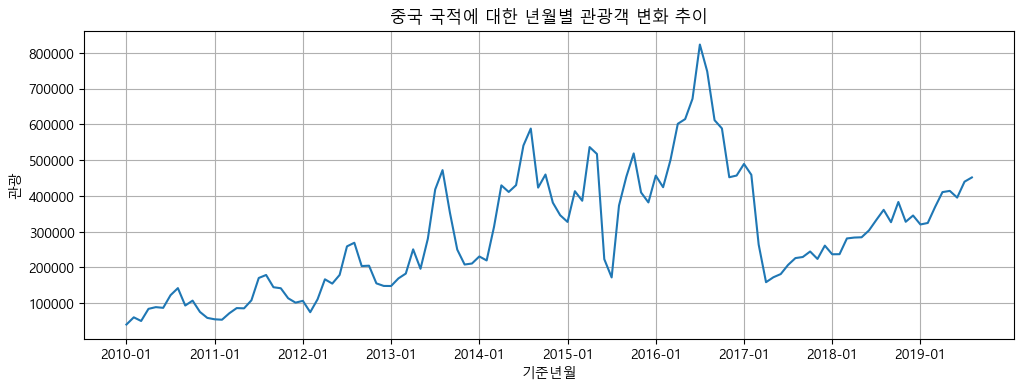

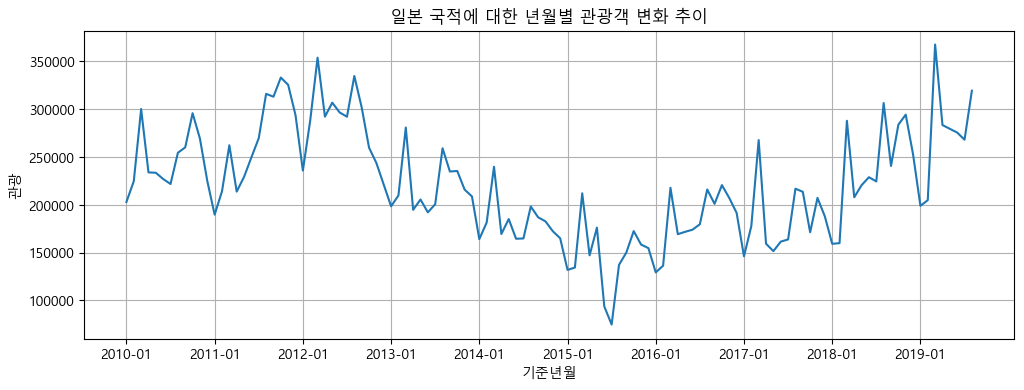

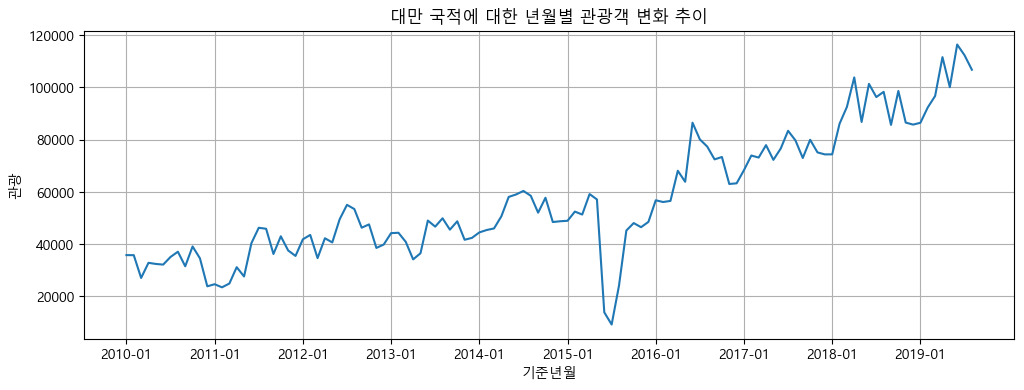

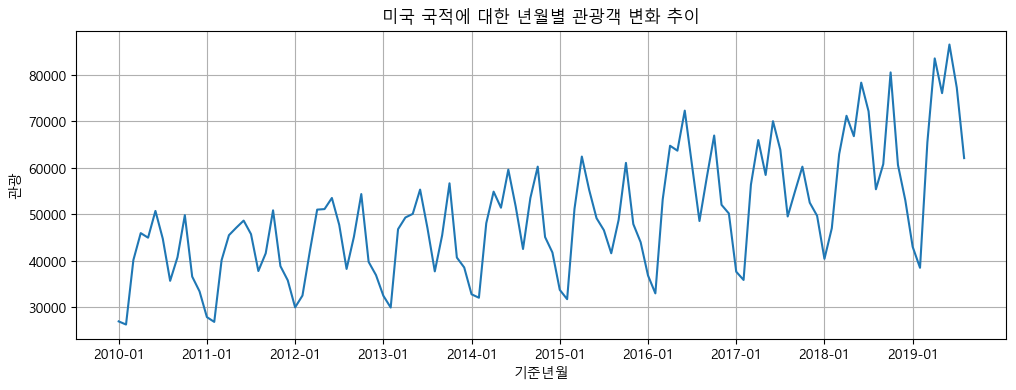

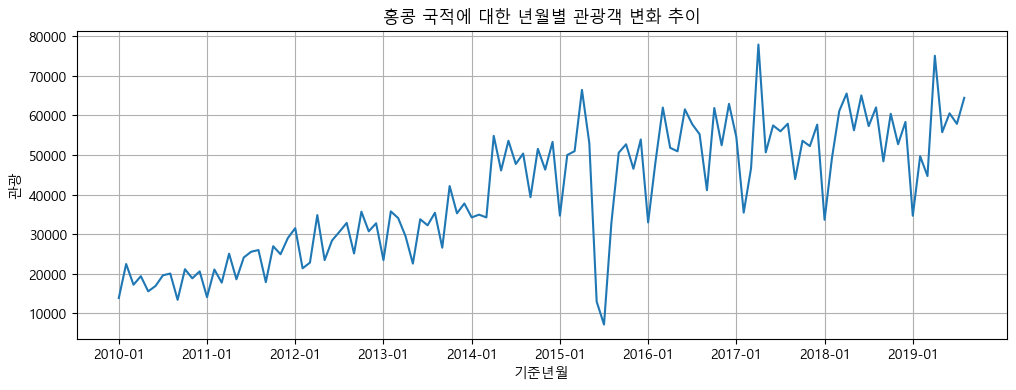

In [14]:
### 위에서 중국 국가에 대해 시각화한 샘플 코드를 이용해서
# Top5 국가를 반복하면서 5개의 그래프를 그려주세요..

for i in range(0,5,1):
    # print(f"{temp['국적'][i]}")
    c = df["국적"] == temp["국적"][i]
    df_fillter = df[c == True]
    
    plt.figure(figsize=(12,4))
    plt.title(f"{temp['국적'][i]} 국적에 대한 년월별 관광객 변화 추이")
    plt.plot(df_fillter["기준년월"], df_fillter["관광"])
    plt.xlabel("기준년월")
    plt.ylabel("관광")
    x_list = ["2010-01", "2011-01", "2012-01","2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
    plt.xticks(x_list)
    plt.grid()
    plt.show()

### 각각의 그래프를 하나의 그래프로 시각화해서 확인하기

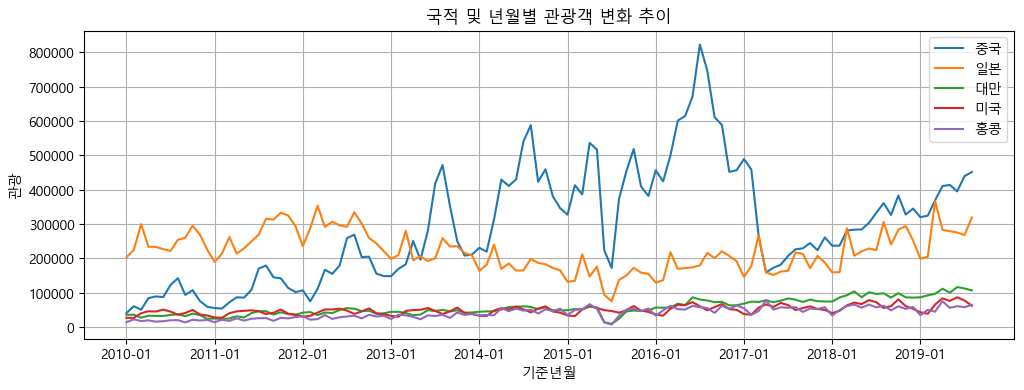

In [15]:
### 위에서 중국 국가에 대해 시각화한 샘플 코드를 이용해서
# Top5 국가를 반복하면서 5개의 그래프를 그려주세요..


    
plt.figure(figsize=(12,4))

plt.title(f"국적 및 년월별 관광객 변화 추이")

for i in range(0,5,1):
    c = df["국적"] == temp["국적"][i]
    df_fillter = df[c == True]
    
    plt.plot(df_fillter["기준년월"], df_fillter["관광"])
    
plt.xlabel("기준년월")
plt.ylabel("관광")
x_list = ["2010-01", "2011-01", "2012-01","2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
plt.xticks(x_list)

# - 범례 표시하기
plt.legend(temp["국적"])

plt.grid()
plt.show()

### 히트맵 시각화를 통해 상사하게 확인하기

In [16]:
"""
 - 선 그래프는 x축, y축 2개의 데이터를 이용하여 추이를 확인하는데 사용
 - 히트맵 그래프는 좀 더 상세하게 확인이 가능함
   : 히트맵은 x축, y축 표현되는 값 3개의 데이터가 필요함
   : 년도, 월, 국가별관광객비율 데이터 3가지 사용
   : 년도 및 월 컬럼 추가해서 사용 (원본 데이터프레임은 사용안함, 복사본 사용)
"""

'\n - 선 그래프는 x축, y축 2개의 데이터를 이용하여 추이를 확인하는데 사용\n - 히트맵 그래프는 좀 더 상세하게 확인이 가능함\n   : 히트맵은 x축, y축 표현되는 값 3개의 데이터가 필요함\n   : 년도, 월, 국가별관광객비율 데이터 3가지 사용\n   : 년도 및 월 컬럼 추가해서 사용 (원본 데이터프레임은 사용안함, 복사본 사용)\n'

In [17]:
### 원본 df 데이터프레임을 df2라는 변수명으로 복사해서 사용
# - copy() : 원본과 같은 새로운 메모리를 만들어서 주소를 반환해줌
#          : 원본 메모리 주소는 유지됨
df2 = df.copy()

df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,자국내_관광객비율,국가별_관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.387,3.461
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.000,0.138
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.076,3.337
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.222,0.041
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.598,0.051
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.784,0.166
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.158,0.003


In [18]:
### 년도 및 월에 대한 컬럼 추가하기

In [19]:
### 년도 및 월 테스트
# - 기준년월 컬럼의 0번째 행 인덱스 위치의 값을 이용해서
# - 년도와 월 데이터를 추출해 주세요..
# - 년도 추출
df2["기준년월"][0][:4]
# - split("구분자") : 문자열함수이며, 문자열 내에 툭수기호로 구분된 경우 리스트로 분리 가능
df2["기준년월"][0].split("-")[0]

# - 월 추출
# df2["기준년월"][0][5:]
df2["기준년월"][0].split("-")[1]

'01'

In [20]:
### 년도 및 월에 대한 리스트 만들기(for문 이용)
# 깨끗한 년도 및 월에 대한 리스트 변수 정의
y_list = []
m_list = []

for idx in range(0,len(df2),1) :
    # print(df2["기준년월"][idx][:4], df2["기준년월"][idx][5:])
    y_list.append(df2["기준년월"][idx][:4])
    m_list.append(df2["기준년월"][idx][5:])
len(y_list), len(m_list)

(6960, 6960)

In [21]:
### 년도 및 월에 대한 리스트 만들기(단순 for문 이용)

# - 뒤에서부터 해석 
y_list = [df2["기준년월"][idx][:4] for idx in range(0,len(df2),1)]
m_list = [df2["기준년월"][idx][5:] for idx in range(0,len(df2),1)]

# for idx in range(0,len(df2),1) :
#     # print(df2["기준년월"][idx][:4], df2["기준년월"][idx][5:])
#     y_list.append(df2["기준년월"][idx][:4])
#     m_list.append(df2["기준년월"][idx][5:])
len(y_list), len(m_list)

(6960, 6960)

In [22]:
df2["년도"] = y_list

In [23]:
df2["월"] = m_list

In [24]:
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,자국내_관광객비율,국가별_관광객비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.387,3.461,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.000,0.138,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.076,3.337,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.222,0.041,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.598,0.051,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.784,0.166,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.158,0.003,2019,08


In [25]:
### 반복문을 사용하지 않고 처리하기
# - 시리즈 각 인덱스의 값을 자동 처리
# - 시리즈 결과의 각 인덱스 값을 문자열로 인식하여 슬라이싱 가능함
#  --> 행 데이터가 매우 많을 경우 for문 방식보다 매우 빠른 속도로 처리됨
df2["년도"] = df2["기준년월"].str[:4]
df2["월"] = df2["기준년월"].str[5:]

In [26]:
df2.head(2)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,자국내_관광객비율,국가별_관광객비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929,2010,01


### 중국 국적의 데이터로 샘플링하기

In [27]:
### 중국 국정의 데이터 전체 조회하기
# - 변수명 df_fillter
c = df2["국적"] == "중국"
df_fillter = df2[c]
df_fillter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,자국내_관광객비율,국가별_관광객비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.300,10.086,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.103,13.569,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.580,9.227,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.050,15.508,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.804,16.952,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.232,29.695,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.721,33.557,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.198,31.926,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.699,36.077,2019,07


In [28]:
'''
<히트맵 특징>
 - 데이터 3개 필요
 - x축과 y축은 범주형 데이터 사용
 - 색을 표시하는 네모 박스 영역은 연속형 데이터(관고강)_ 사용
 - 히트맵에서 y축(년도)은 행 인덱스 영역, x축(월)은 컬럼 인덱스 영역이라고 칭함
 - 히트맵 모양에 맞는 데이터 모양을 만들어야함
   --> 이때 사용하는 함수는 피봇테이블(pivot_table())함수 사용...
'''

'\n<히트맵 특징>\n - 데이터 3개 필요\n - x축과 y축은 범주형 데이터 사용\n - 색을 표시하는 네모 박스 영역은 연속형 데이터(관고강)_ 사용\n - 히트맵에서 y축(년도)은 행 인덱스 영역, x축(월)은 컬럼 인덱스 영역이라고 칭함\n - 히트맵 모양에 맞는 데이터 모양을 만들어야함\n   --> 이때 사용하는 함수는 피봇테이블(pivot_table())함수 사용...\n'

In [29]:
### 피봇테이블을 이용해서 히트맵 모양의 데이터 생성하기
# - 추출할 시나리오(소제목)
# - 년도별 월별 관광객수에 대한 평균 데이터 집계
df_pivot = df_fillter.pivot_table(index="년도",columns="월",values="관광",aggfunc="mean")
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


### 히트맵 시각화 하기

In [30]:
"""
<히트맵 라이브러리>
 - seaborn 라이브러리를 사용합니다
 - seaborn 라이브러리의 부모는 matplotlib 입니다
 - matplotlib 시각화 라이브러리는 그래프의 모양과 색상이 단조롭다면,
   seaborn은 좀 더 화려함을 추구합니다.(파스텔 색상과 유사)
"""

'\n<히트맵 라이브러리>\n - seaborn 라이브러리를 사용합니다\n - seaborn 라이브러리의 부모는 matplotlib 입니다\n - matplotlib 시각화 라이브러리는 그래프의 모양과 색상이 단조롭다면,\n   seaborn은 좀 더 화려함을 추구합니다.(파스텔 색상과 유사)\n'

In [31]:
### matplotlib 라이브러리와 함께 사용됩니다.
# - matplotlib는 이미 위에 불러놓았음

import seaborn as sns

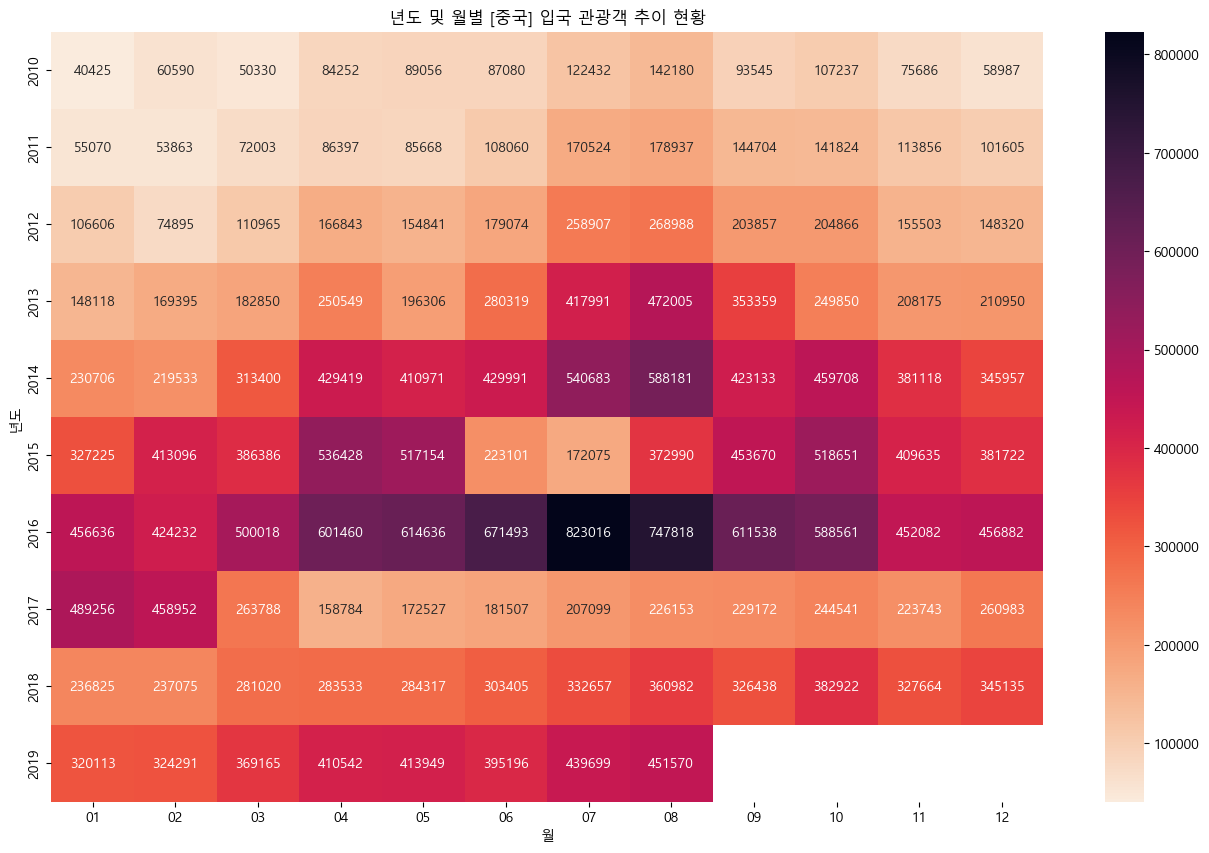

In [32]:
### 그래프 사이즈 지정
plt.figure(figsize=(16,10))

### 그래프 제목 넣기
plt.title("년도 및 월별 [중국] 입국 관광객 추이 현황")

### 히트맵 그리기
# - annot : 숫자값을 보여줄지 말지 결정 (기본값 False, 생략가능)
# - fmt=".0f" : 소숫점 자리수 0의 자리까지 표현 (f는 실수를 의미함) 
# - cmap : color map(색상 지도), 다양한 색상지도가 존재함(개인들이 만들어 놓은게 많음)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

### 그래프 메모리 삭제
plt.show()

### 상위 Top5 국가 모두 히트맵을 각각 그려주세요

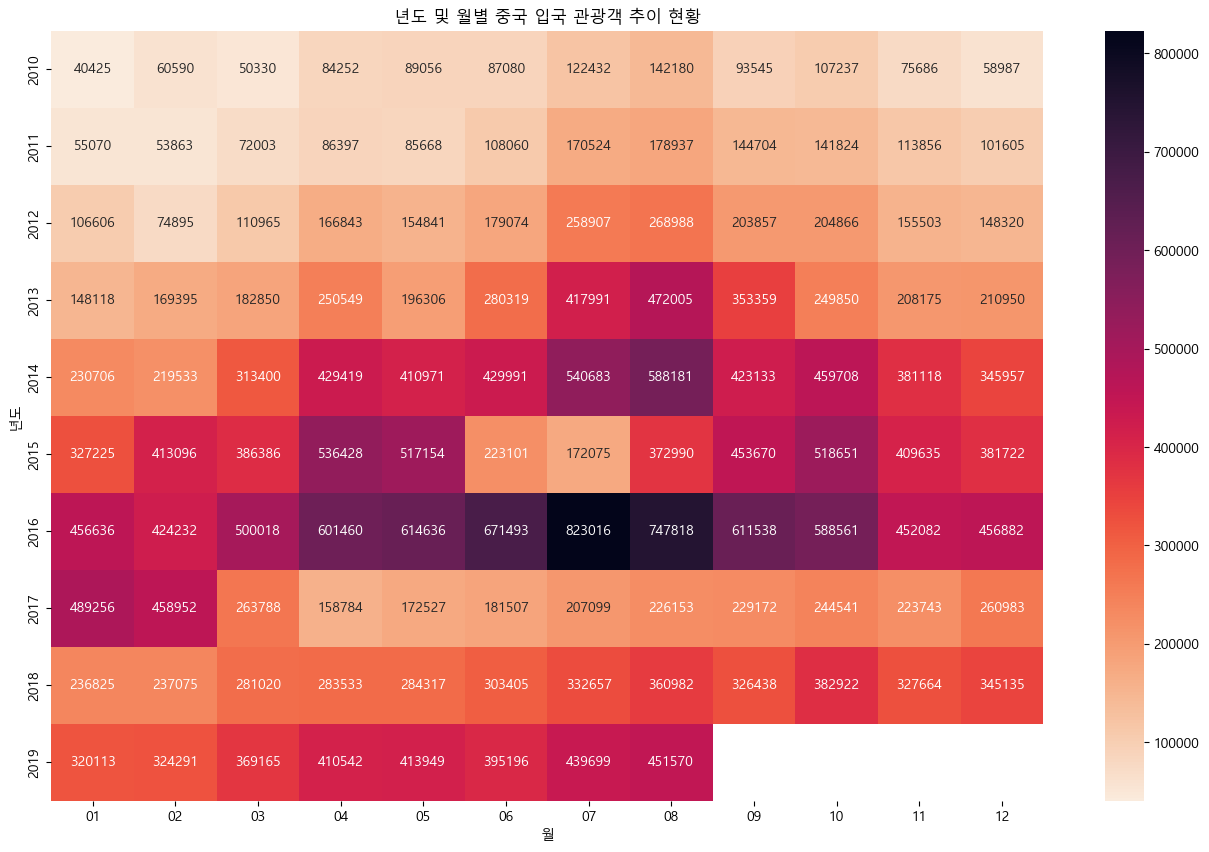

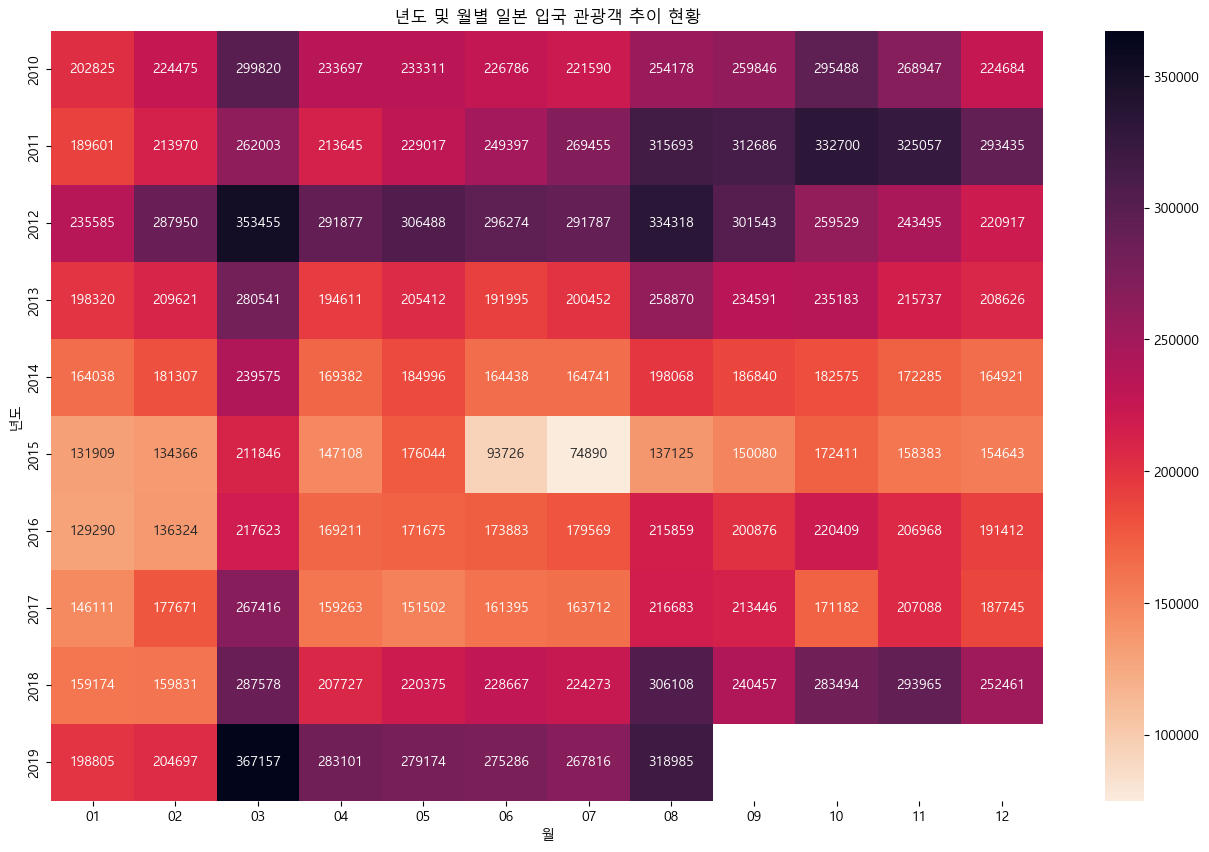

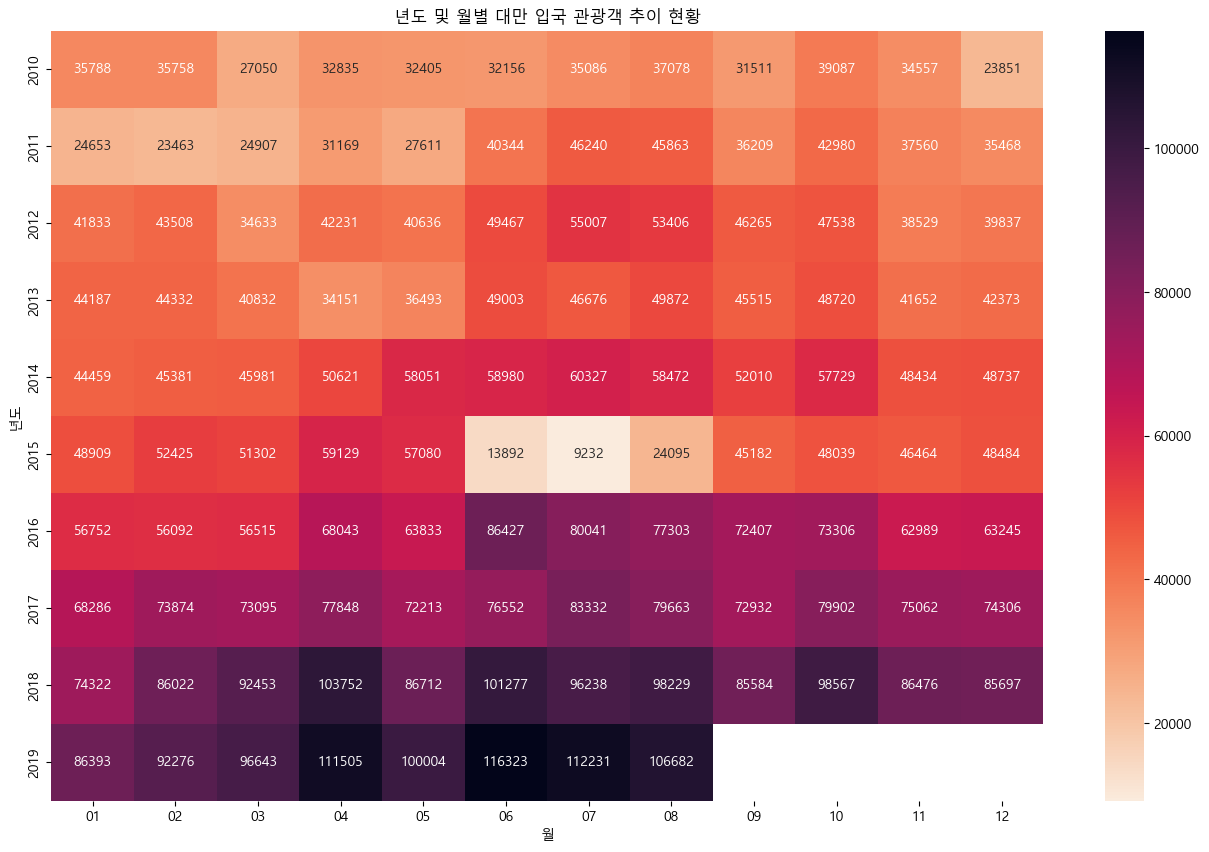

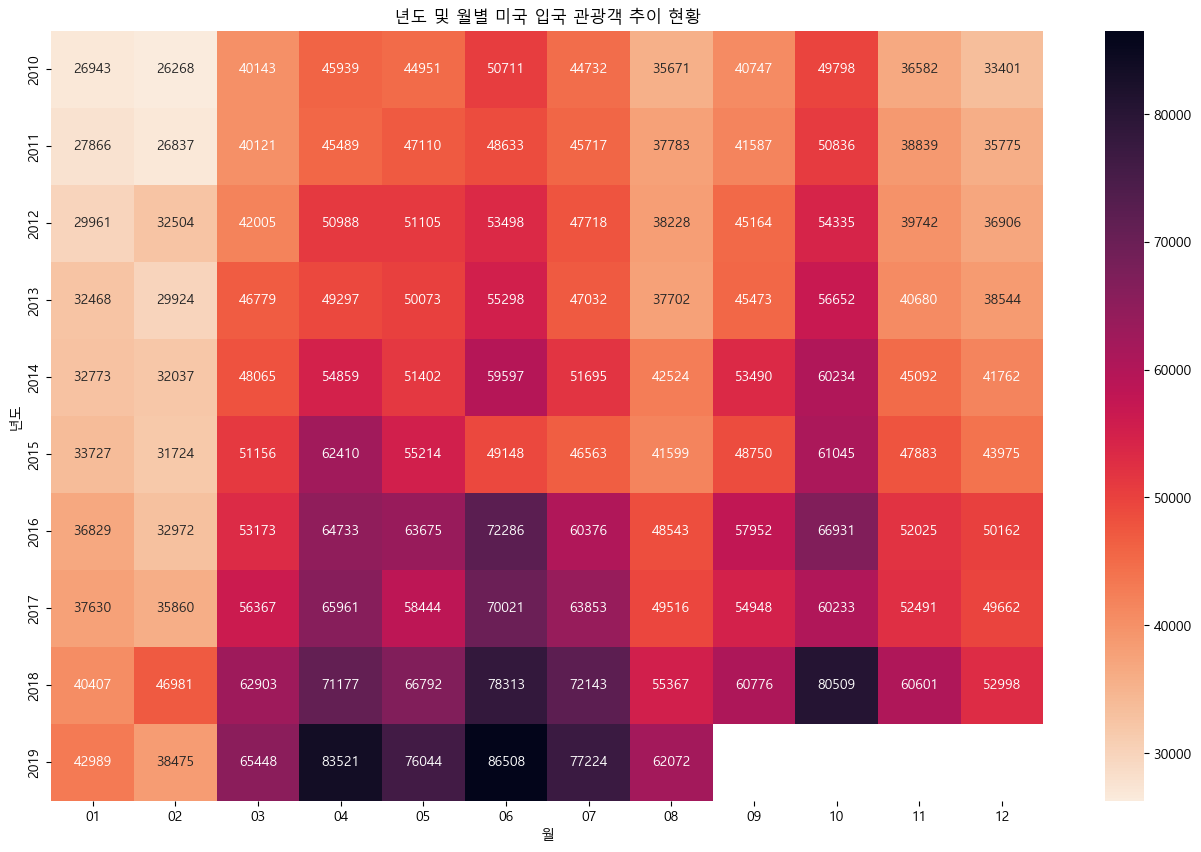

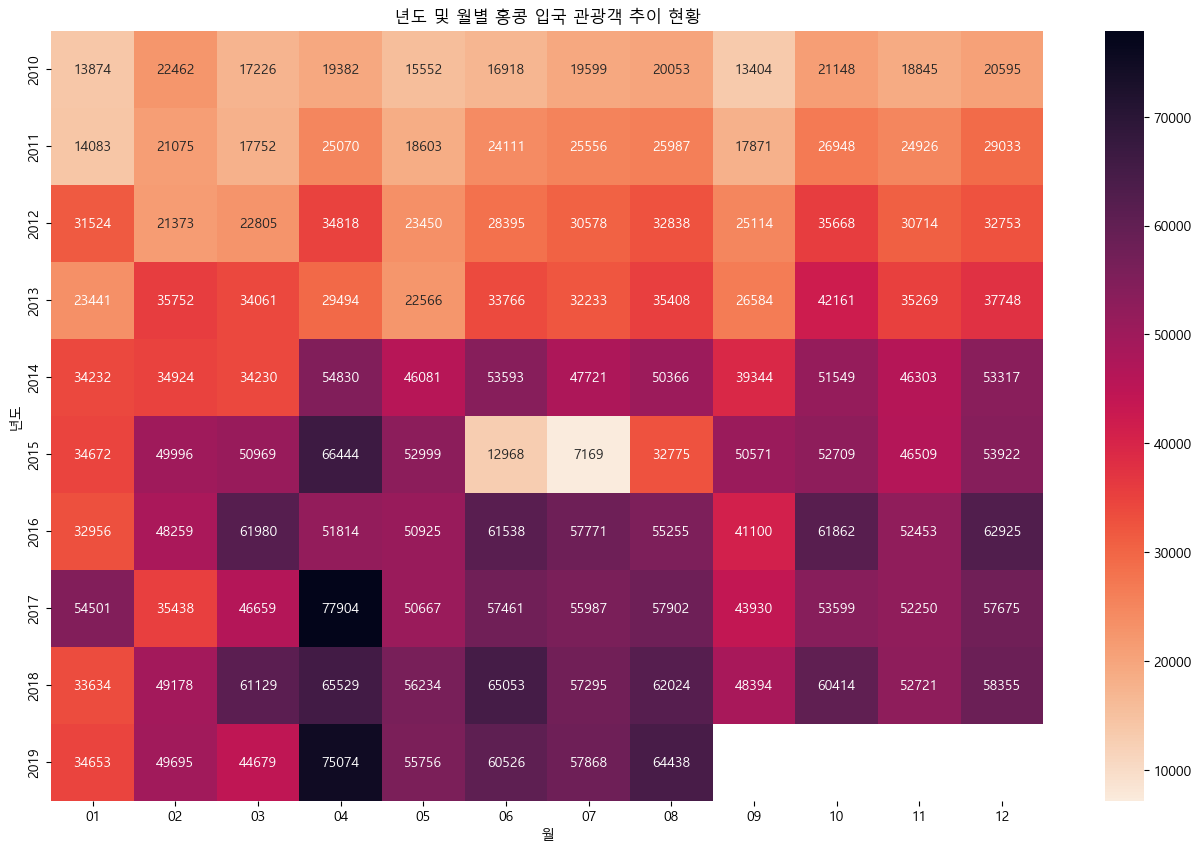

In [33]:
for i in range(0,5,1):
    c = df2["국적"] == f"{temp['국적'][i]}"
    df_fillter = df2[c]
    df_fillter
    
    df_pivot = df_fillter.pivot_table(index="년도",columns="월",values="관광",aggfunc="mean")
    ### 그래프 사이즈 지정
    plt.figure(figsize=(16,10))
    
    ### 그래프 제목 넣기
    plt.title(f"년도 및 월별 {temp['국적'][i]} 입국 관광객 추이 현황")
    
    ### 히트맵 그리기
    # - annot : 숫자값을 보여줄지 말지 결정 (기본값 False, 생략가능)
    # - fmt=".0f" : 소숫점 자리수 0의 자리까지 표현 (f는 실수를 의미함) 
    # - cmap : color map(색상 지도), 다양한 색상지도가 존재함(개인들이 만들어 놓은게 많음)
    sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")
    
    ### 그래프 메모리 삭제
    plt.show()

### 대륙별로 자국관광객 비율에 대한 추이 분석

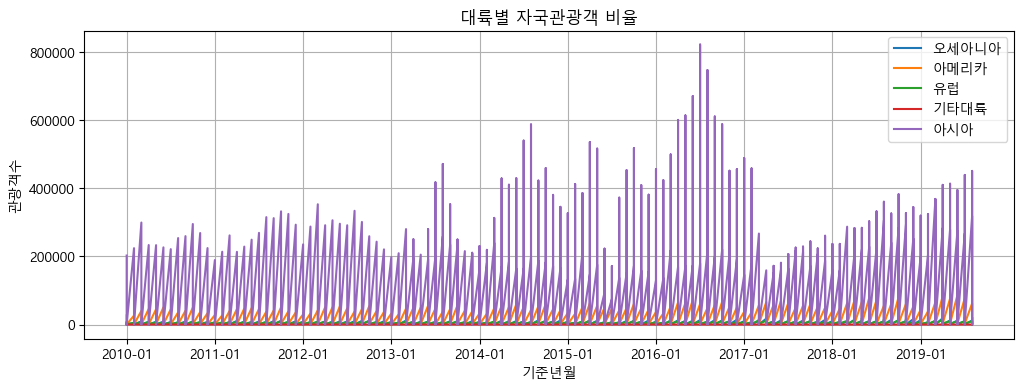

In [49]:
### 1. 대륙별로 년월별 관광객 추이 시각화

# - 사용할 데이터 : 대륙, 자국관광객비율
# - 시각화 : 선그래프

temp1 = df.pivot_table(index ="대륙", values="자국내_관광객비율", aggfunc="mean")

temp1 = temp1.sort_values("자국내_관광객비율",ascending=False)

temp1.reset_index(inplace=True)

plt.figure(figsize=(12,4))

plt.title(f"대륙별 자국관광객 비율")

for i in range(0,5,1):
    c = df2["대륙"] == temp1["대륙"][i]
    df_fillter = df[c == True]
    
    plt.plot(df_fillter["기준년월"], df_fillter["관광"])
    
plt.xlabel("기준년월")
plt.ylabel("관광객수")
x_list = ["2010-01", "2011-01", "2012-01","2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"]
plt.xticks(x_list)

# - 범례 표시하기
plt.legend(temp1["대륙"])

plt.grid()
plt.show()

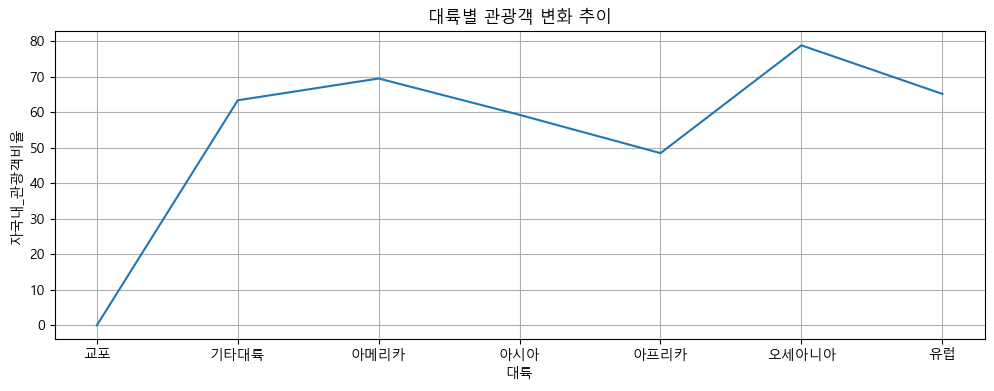

In [51]:
### 2. 대륙별 관광객 추이 시각화(년월 제외)
# - 사용 데이터 : 대륙, 자국관광객비율(또는 관광)
# - 선그래프
# - 1. 데이터 집계하기
temp1 = df.pivot_table(index ="대륙", values="자국내_관광객비율", aggfunc="mean")

# - 2. 인덱스를 컬럼으로 변환하기
temp2 = temp1.reset_index(inplace=True)
#temp1 = temp1.sort_values("관광",ascending=False)

# - 3. 선그래프 시각화
plt.figure(figsize=(12,4))
plt.title(f"대륙별 관광객 변화 추이")
plt.plot(temp1["대륙"], temp1["자국내_관광객비율"])
    
plt.xlabel("대륙")
plt.ylabel("자국내_관광객비율")

plt.grid()
plt.show()